# Customer Churn
***
## Introduction
Customer churn is a busines term to describe the act of a customer unsubscribing, leaving, or otherwise ceasing to use your service. Custoemr churn rate can be calculate as the number of customers you lost during a certain window of time divided by the number of customers you started off with before that time window (multiplied by 100 to get a percentage).

For example, let's say at the start of a quarter (3-month period) you had 1000 customers, and after the quarter you have 900 customers. Thus you're churn rate is 

$$\begin{equation}
    C_R = \frac{1000-900}{1000} * 100 = 10% 
\end{equation}$$

Why is customer churn rate so important? An obvious point to observe is that any business does not want to regularly lose customers. However, digging a little deeper you might accept a churn rate of 5% per month if the number of new customers is 10%, meaning overall your customer base is growing by 5%. However, studies have shown that gaining new customers is anywhere between 5 - 25x more expensive than retaining existing customers [[1]](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers). If the above case, even though your customer base is growing by 5% you are actually spending more money than if you were able to decrease churn rate to 0% and only recruit 5% new customers per quarter. Same growth rate but different net profit for the company.

#### Strategising

Being able to predict which customers are likely to churn is a key to designing marketing strategies for companies large and small. If you can categorise customers on the likelihood of them churning - say very likely, not likely, impossible - then you can target the high risk customers with timely offers to make them stay. 

#### Traditional Approach to Strategy
For example, most of us have gone through the process of changing our internet or phone provider at some point or another. When you speak to the first person and tell them you would like to cancel you're subscription you are now immediately an at risk customer. This first employee of said company will usually ask why you would like to stop you're service. If you are moving they will simply offer to retain you by providing internet to your new house. Thats an easy retention scheme because it costs the company no money and keeps you with them. If you're moving to a new provider because you found a better deal then you are now classes at very risky and so you might get a new offers from the company which is better than your existing package to try to convince you to stay. This costs the company some of their profit margin, but they still keep you. If you are still intent on leaving you will usually get passed to a special team which is specifically in charge of dealing with customers at the end of the line. This is where all the action happens. You are now classed at the highest level of risk and this team has the ability to offer you the best deals available in a last ditch attempt to keep you. These offers cost the company the most of their profit margin and this is why they are reserved for the most at risk customers. 

You can see how the internet companies design their offers around your level of risk thereby striking a balance between keeping customers whilst keeping them at the highest price plan that the customers will willingly stay for.

#### Data  Approach to Strategy
The above example is a very traditional approach to customer churn and has been done for years. More recently, companies have leveraged the huge amount of historic data they have on customers to build profiles and try to predict before you even call if you are likely to churn. This is a good strategy from the companies perspective as by the time you make the call to the company you are clearly quite intent on leaving. 

The models that are built from the historic data will highlight customers that are likely to churn based on various things, e.g. for a cell phone provider maybe the number of texts you said, total length of calls in a month, internet usage, etc etc. If the model highlights you as risky you will get a seemingly unexpected call from the blue from your provider offering you an early upgrade or some new better deal. You are pleasantly surprised and take the offer and tell your friends how great company X is because they gave you a better deal without you even having to ask. You, happy with your new offer never look to other provders, and company X has secured a customer for another 2 year contract without having to spend millions on marketing campaigns targeting new customers. Behind the scenes the company is trying to cut you off early before you even start looking into other deals at other providers as at this point it is already very hard to keep you without having to offer you their least profitable deal.


From these examples, the power that lies in accurate customer churn prediction is clear so let's try to do it for a dataset

***
## Data
The data is taken from [KDD Cup 2009: Customer relationship prediction](https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Data)

From the website,

"*The KDD Cup 2009 offers the opportunity to work on large marketing databases from the French Telecom company Orange to predict the propensity of customers to switch provider (churn), buy new products or services (appetency), or buy upgrades or add-ons proposed to them to make the sale more profitable (up-selling)."*

and

"*Both training and test sets contain 50,000 examples. The data are split similarly for the small and large versions, but the samples are ordered differently within the training and within the test sets. Both small and large datasets have numerical and categorical variables. For the large dataset, the first 14,740 variables are numerical and the last 260 are categorical. For the small dataset, the **first 190 variables are numerical** and the **last 40 are categorical**."*

I have taken the small dataset which consists of 230 independent variables. Furthermore, I have download only the data for customers who churn so I will not be trying to predict appetency or up-selling labels.

### Format

The datasets use a format similar as that of the text export format from relational databases:

1. One header lines with the variables names
2. One line per instance
3. Separator tabulation between the values
4. There are missing values (consecutive tabulations)

The target values (.labels files) have one example per line in the same order as the corresponding .data files. Note that churn, appetency, and up-selling are three separate binary classification problems. The target values are +1 or -1. We refer to examples having +1 (resp. -1) target values as positive (resp. negative) examples.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

First let's load the data, make a list of numerical and categorical columns, and also a new dataframe containing the independent variables joined with the target variable

In [2]:
df_train_variables = pd.read_csv("../data/orange_small_train.data", delimiter="\t")
#df_test_variables = pd.read_csv("../data/orange_small_test.data", delimiter="\t")
df_train_target = pd.read_csv("../data/orange_small_train_churn.labels", delimiter="\t", 
                              header=None)
df_train_target.columns = ['target']

In [3]:
print("Length of training data is {}".format(len(df_train_variables)))
print("Length of target data is {}".format(len(df_train_target)))
#print("Length of testing data is {}".format(len(df_test_variables)))


Length of training data is 50000
Length of target data is 50000


In [4]:
df_train_target.head()

,target
0,-1
1,1
2,-1
3,-1
4,-1


In [5]:
df_train_variables.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [6]:
numerical_cols = df_train_variables.columns[:190]
categorical_cols = df_train_variables.columns[-40:]
print(numerical_cols)
print(categorical_cols)

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10',
       ...
       'Var181', 'Var182', 'Var183', 'Var184', 'Var185', 'Var186', 'Var187',
       'Var188', 'Var189', 'Var190'],
      dtype='object', length=190)
Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var209', 'Var210', 'Var211',
       'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229', 'Var230'],
      dtype='object')


In [7]:
#bDataframes will automatically align based on index thanks to numpy running under the hood
df_complete = pd.concat([df_train_variables, df_train_target], axis=1, sort=False)
df_complete.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,-1


***
# Data Preprocessing


## Missing values
First let's look at the dataset and how many missing values it has. 

First thing to do notice is that there is quite a few columns that do not have any data whatsoever so let's just drop these.

In [8]:
df_complete.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var1,702.0,11.487179,40.709951,0.0,0.00,0.00,16.00,680.0
Var2,1241.0,0.004029,0.141933,0.0,0.00,0.00,0.00,5.0
Var3,1240.0,425.298387,4270.193518,0.0,0.00,0.00,0.00,130668.0
Var4,1579.0,0.125396,1.275481,0.0,0.00,0.00,0.00,27.0
Var5,1487.0,238793.328850,644125.905205,0.0,0.00,0.00,118742.50,6048550.0
...,...,...,...,...,...,...,...,...
Var189,21022.0,270.142137,86.707692,6.0,204.00,270.00,330.00,642.0
Var190,333.0,22007.045192,29085.146490,0.0,2732.67,12668.94,29396.34,230427.0
Var209,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var230,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_cleaned = df_complete.dropna(axis=1, how='all')
df_cleaned.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,target
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1


In [10]:
# Update the list of numerical and categorical columns
numerical_cols = df_cleaned.columns & numerical_cols
categorical_cols = df_cleaned.columns & categorical_cols

print(numerical_cols)
print(categorical_cols)

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var10',
       'Var11',
       ...
       'Var180', 'Var181', 'Var182', 'Var183', 'Var184', 'Var186', 'Var187',
       'Var188', 'Var189', 'Var190'],
      dtype='object', length=174)
Index(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197',
       'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229'],
      dtype='object')


What this graph shows is that a huge proportion of the independent variables are missing more than 90% of their entries. Using variables with this much missing data is inevitably going to add a lot of noise so I am going to drop any column that has < 20,000 entries

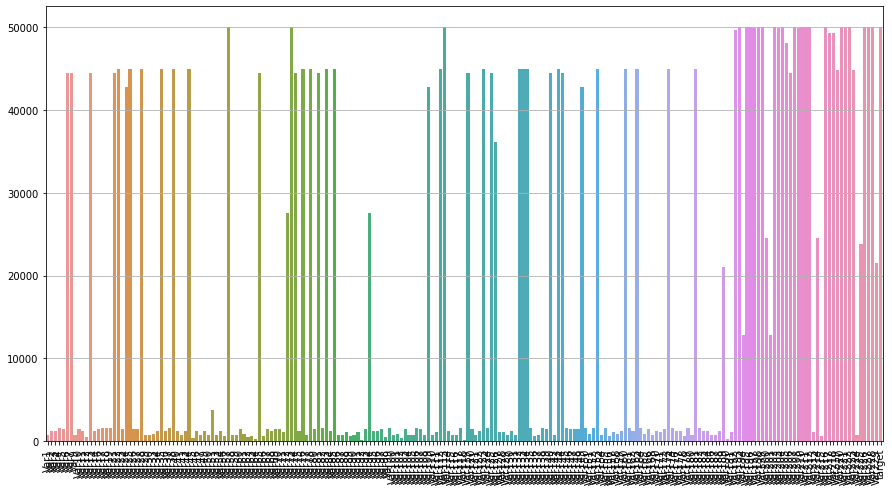

In [11]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.grid()
sns.barplot(x=df_cleaned.columns, y= df_cleaned.count())

In [12]:
df_cleaned = df_cleaned[df_cleaned.columns[df_cleaned.count() > 20000]]
df_cleaned.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,target
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1


In [13]:
# Update numerical and categorical columns
numerical_cols = df_cleaned.columns & numerical_cols
categorical_cols = df_cleaned.columns & categorical_cols

print(numerical_cols)
print(categorical_cols)

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74',
       'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153',
       'Var160', 'Var163', 'Var173', 'Var181', 'Var189'],
      dtype='object')
Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object')


This is looking much better. 

Lots of the columns seems to have a count around the 45,000 mark and the lowest is 21,000 entries.

In [14]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var6,44471.0,1.326437e+03,2.685694e+03,0.000000e+00,5.180000e+02,8.610000e+02,1.428000e+03,131761.00
Var7,44461.0,6.809496e+00,6.326053e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,140.00
Var13,44461.0,1.249688e+03,2.794955e+03,0.000000e+00,0.000000e+00,2.320000e+02,1.604000e+03,197872.00
Var21,44471.0,2.345182e+02,5.655601e+02,0.000000e+00,1.120000e+02,1.440000e+02,2.280000e+02,36272.00
Var22,44991.0,2.902454e+02,7.044900e+02,0.000000e+00,1.350000e+02,1.800000e+02,2.850000e+02,45340.00
Var24,42770.0,4.507926e+00,9.928819e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,494.00
Var25,44991.0,9.682701e+01,2.143183e+02,0.000000e+00,1.600000e+01,4.800000e+01,1.120000e+02,13168.00
Var28,44989.0,2.245077e+02,9.852024e+01,-6.688000e+01,1.665600e+02,2.200800e+02,2.664000e+02,5158.56
Var35,44991.0,7.168100e-01,2.996007e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,110.00
Var38,44991.0,2.579107e+06,3.010076e+06,0.000000e+00,7.794000e+03,1.290246e+06,4.570944e+06,18846900.00


I will first consider the numerical data.

***
### Numerical Columns
#### Imputation Methods

To work out values for imputation there is many possibilities. 

**Mean/median** is the easiest to implement but it doesn't take into account possible correlations between other indepedent variables.

**Mode** could be used but it has the possibility to introduce bias into the data as well as not factoring in correlations.

A more advanced method that takes into account other independent variables is **KNN**. For a column with a missing value, you peform KNN on a subset of the data that has values for the column of interest whilst also including the other variables. Then you find the nearest neighbours to your data point and assign its missing value to the average of the K nearest neighbours. Downside is that KNN is computationally expensive and also can succumb to curse of dimensionality.

Another approach is **regression imputation**. If there is high correlation between a column with missing values and another column(s), then if you regress the column with missing values onto the column it is correlated with you can predict the missing values.

The first step is in all this is to look for correlations in the data as that would rule out the last two methods.

This graph shows that for most the numerical data there is no correlation but for a few there is indeed some high correlation and so maybe we can use one of the last two methods to impute data.

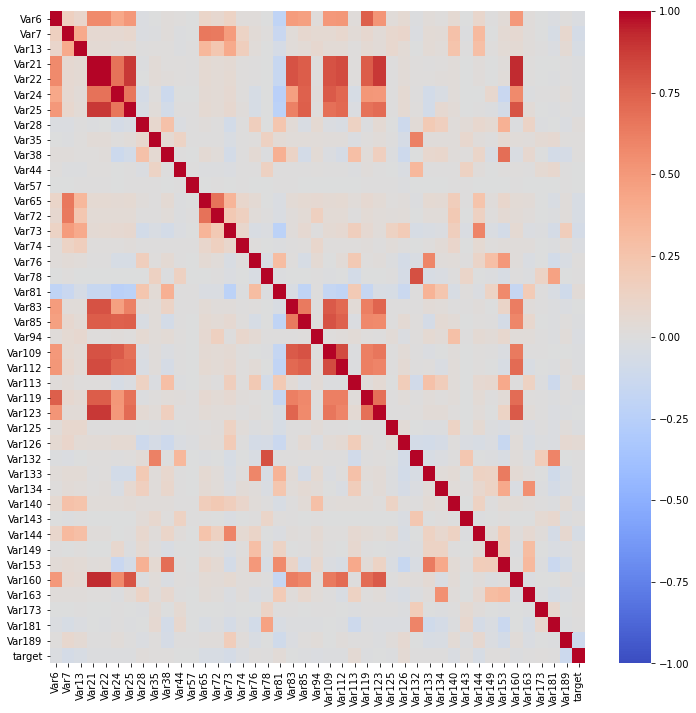

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, cmap='coolwarm')

Let's extract out the columns that have < 40000 entries and see which columns they are most highly correlated with.

In [16]:
missing_data_cols_4000 = df_cleaned[numerical_cols[df_cleaned[numerical_cols].count() < 40000]].columns
missing_data_cols_4000

Index(['Var72', 'Var94', 'Var126', 'Var189'], dtype='object')

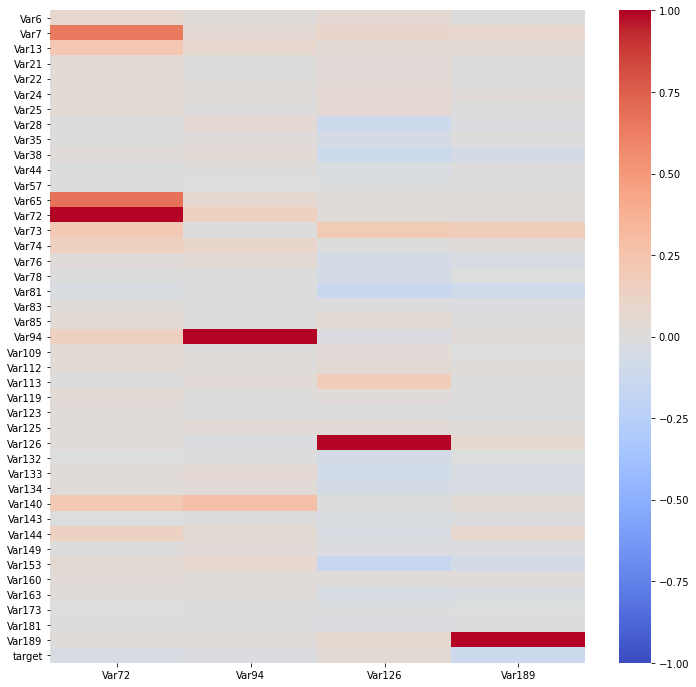

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr()[missing_data_cols_4000],  vmin=-1, vmax=1, cmap='coolwarm')

To get the columns that each of these columns with missing values is most closely correlated with, Ill define a function that extracts out columns if the correlation value > 0.5

In [18]:
def get_correlated_columns(df_correlation, all_columns, missing_data_cols, threshold, col):

    return all_columns[df_correlation[missing_data_cols][col] > threshold].drop(col).values

In [19]:
df_correlation = df_cleaned.drop('target', axis=1)[numerical_cols].corr()

So there is actually only 1 column with < 4000 entries and that has a correlation of > 0.5 with another column. For this column let's use regression imputation

In [20]:
for col in missing_data_cols_4000:
    print(get_correlated_columns(df_correlation, numerical_cols, missing_data_cols_4000, 0.5, col))

['Var7' 'Var65']
[]
[]
[]


#### Regression Imputation for 'Var72'

In [21]:
x_cols = get_correlated_columns(df_correlation, numerical_cols, missing_data_cols_4000, 0.5, missing_data_cols_4000[0])

In [22]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)

In [23]:
regression_df = df_cleaned[[x_cols[0], x_cols[1], missing_data_cols_4000[0]]]
regression_df.dropna(axis=0, inplace=True, )
regression_df.head()

/Users/shane/anaconda3/envs/cust_churn/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Var7,Var65,Var72
1,0.0,9.0,3.0
4,7.0,18.0,3.0
8,7.0,27.0,3.0
9,7.0,18.0,3.0
11,14.0,27.0,6.0


In [24]:
model.fit(regression_df[x_cols], regression_df[missing_data_cols_4000[0]])
model.coef_

array([0.11353255, 0.09041167])

In [25]:
# Get the entries where 'Var72' is NaN and drop entries where either 'Var7' or 'Var65' is NaN
X_values = df_cleaned[np.isnan(df_cleaned['Var72'])][x_cols]
X_values = X_values.dropna(axis=0)
X_values

,Var7,Var65
0,7.0,9.0
2,7.0,9.0
3,0.0,9.0
5,7.0,9.0
6,7.0,9.0
...,...,...
49978,7.0,9.0
49979,0.0,9.0
49985,0.0,9.0
49987,7.0,36.0


In [26]:
# We now have 17000 values to imputate for 'Var72'
predicted = pd.DataFrame(model.predict(X_values), index=X_values.index, columns=['Var72'])
index = predicted.index
predicted

,Var72
0,3.332804
2,3.332804
3,2.538076
5,3.332804
6,3.332804
...,...
49978,3.332804
49979,2.538076
49985,2.538076
49987,5.773919


In [27]:
# Overwrite ensures if keys overlap the original value is not overwritten.
df_cleaned.update(other=predicted, overwrite=False)

Okay, so now we have only ~ 5000 missing values for 'Var72'

In [28]:
df_cleaned['Var72'].count()

44461

### Mean/Median/Mode Imputation
Now for the rest of the data that is missing in 'Var72', 'Var94', 'Var126', and 'Var189' since they do not correlate strongly with other columns (or for the left over missing in 'Var72' the correlated columns are missing values for that entry) we should now check the distribution of values to see which kind of imputation is most appropriate.

For all but 'Var94', even though they are numerical columns the data seems to be quite discretised. In these cases the mode, or median is probably going to be most applicable. But first let's check if they are normally distributed

In [29]:
for col in missing_data_cols_4000:
    print("There is {} unique values for {}".format(df_cleaned[col].dropna(axis=0).nunique(), col))

There is 39 unique values for Var72
There is 20002 unique values for Var94
There is 51 unique values for Var126
There is 97 unique values for Var189


In [30]:
df_cleaned[missing_data_cols_4000].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var72,44461.0,3.841792,1.947451,2.538076,3.00,3.0,3.332804,24.0
Var94,27620.0,98671.065858,180633.296795,0.000000,8630.25,41091.0,117353.250000,5640330.0
Var126,36080.0,-0.553880,22.532095,-32.000000,-20.00,4.0,10.000000,68.0
Var189,21022.0,270.142137,86.707692,6.000000,204.00,270.0,330.000000,642.0


As you can see from the plot below 'Var72' is not normally distributed, and so mean would be a bad choice for an imputation scheme. More appropriate would be the median or mode as they are more representative of a typical sample value for 'Var72'.

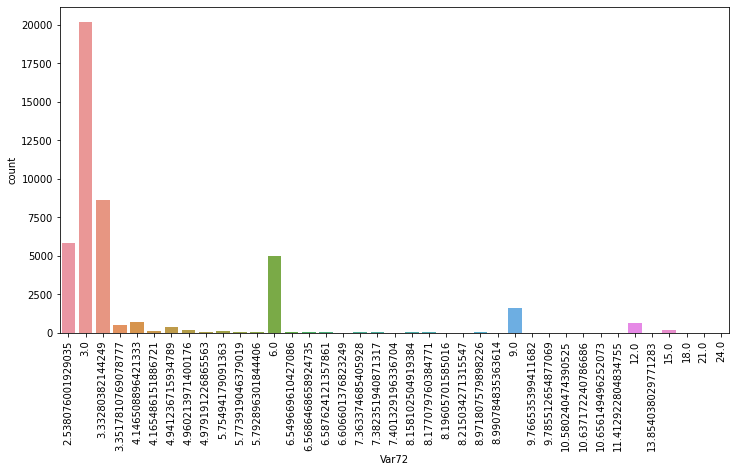

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))


 For this column the median and mode are the same so let's impute that value

In [32]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[0]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))
print('The standard devation of Var72 is {}'.format(np.std(df_cleaned[missing_data_cols_4000[0]].dropna(axis=0))))

The mean of Var72 is 3.841792161274035
The median of Var72 is 3.0
The mode of Var72 is 3.0
The standard devation of Var72 is 1.947428905938224


In [33]:
median = 3
df_cleaned['Var72'].fillna(value=3, inplace=True)
df_cleaned['Var72'].describe()

count    50000.000000
mean         3.748538
std          1.855322
min          2.538076
25%          3.000000
50%          3.000000
75%          3.332804
max         24.000000
Name: Var72, dtype: float64

Now look at the distribution for 'Var126'. This is more evenly distributed than 'Var72' but it is certainly not Gaussian. Furthermore, as can be seen in the boxplot there are quite a few outliers that will bring the mean up. The clear spike at a value of 4 shows that the vast majority of samples of 'Var126' have this value so using this as our imputation value seems appropriate

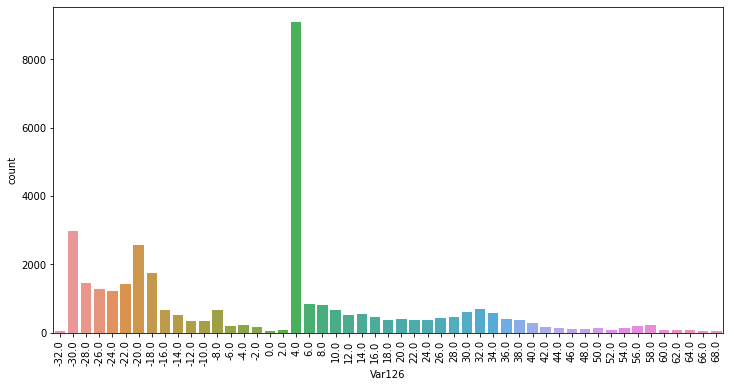

In [34]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[2]].dropna(axis=0))

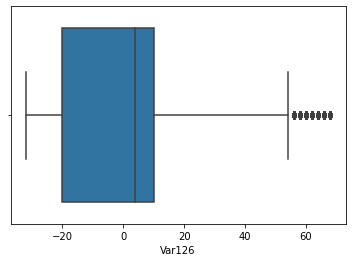

In [35]:
sns.boxplot(df_cleaned[missing_data_cols_4000[2]].dropna(axis=0))

In [36]:
median = 3
df_cleaned['Var126'].fillna(value=4, inplace=True)
df_cleaned['Var126'].describe()

count    50000.00000
mean         0.71392
std         19.24880
min        -32.00000
25%        -18.00000
50%          4.00000
75%          4.00000
max         68.00000
Name: Var126, dtype: float64

Let's now look at 'Var189'. This column looks to be close to being Gaussian distributed so using the mean value is appropriate here. This Gaussian shape is confirmed by the symmetric boxplot although it does show some outliers, particularly at the top end of the distribution.

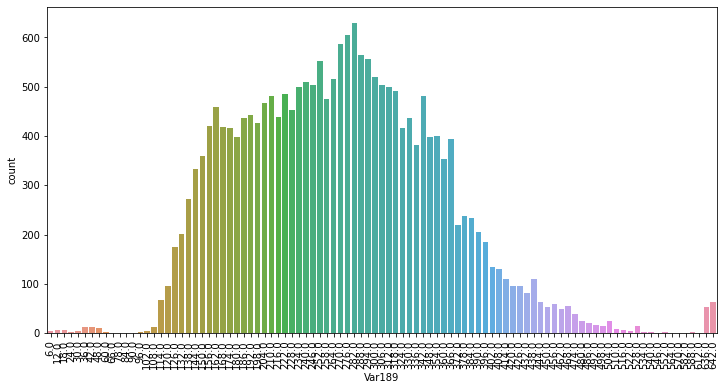

In [37]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))

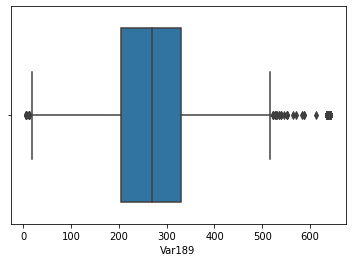

In [38]:
sns.boxplot(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))

The median and mean are the same but the mode is higher. Since this distribution is close to Normal I will use the mean value to impute

In [39]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[-1]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[-1]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))

The mean of Var72 is 270.1421368090572
The median of Var72 is 270.0
The mode of Var72 is 282.0


In [40]:
mean = 270
df_cleaned['Var189'].fillna(value=mean, inplace=True)
df_cleaned['Var189'].describe()

count    50000.000000
mean       270.059760
std         56.221702
min          6.000000
25%        270.000000
50%        270.000000
75%        270.000000
max        642.000000
Name: Var189, dtype: float64

Okay, now let's deal with colum 'Var92' which is continuous.

From both plots below it is clear the data possesses a huge amount of skew towards the low end of the spectrum. Using the mean would not be appropriate here as the massive tail would drag the mean up.

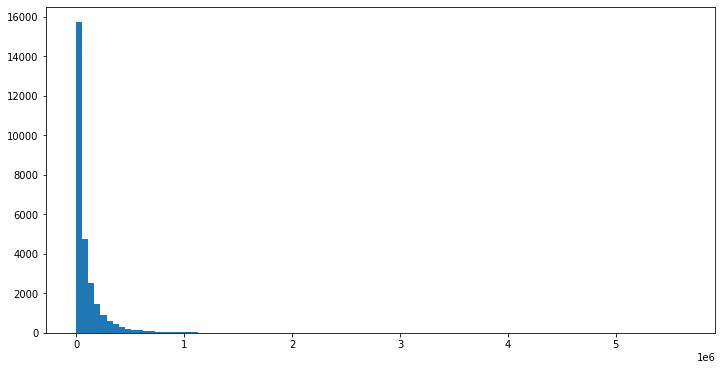

In [41]:
plt.figure(figsize=(12,6))
plt.hist(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0), bins=100)
plt.show()

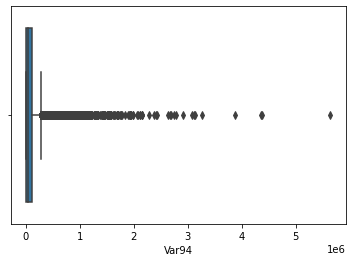

In [42]:
sns.boxplot(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))

As expected the mean is not representative of a typical value for this column and neither is median for the same reason. Mode is the clear choice here so let's impute that into the dataset

In [43]:
print('The mean of Var72 is {}'.format(np.mean(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))))
print('The median of Var72 is {}'.format(np.median(df_cleaned[missing_data_cols_4000[1]].dropna(axis=0))))
value, count = np.unique(df_cleaned[missing_data_cols_4000[1]], return_counts=True)
print('The mode of Var72 is {}'.format(value[np.argmax(count)]))

The mean of Var72 is 98671.06585807385
The median of Var72 is 41091.0
The mode of Var72 is 0.0


In [44]:
mode = 0
df_cleaned['Var94'].fillna(value=mode, inplace=True)
df_cleaned['Var94'].describe()

count    5.000000e+04
mean     5.450590e+04
std      1.429368e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.071000e+03
75%      5.114100e+04
max      5.640330e+06
Name: Var94, dtype: float64

Now we have a good amount of data that is filled in but there is still a lot of columns with only 45000 entries.

It is perculiar that so many of them have either 44471, 44461, or 44991 entries that are not null. There may be many rows where all the entries are missing so let's check this.

In [45]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var6,44471.0,1.326437e+03,2.685694e+03,0.000000e+00,5.180000e+02,8.610000e+02,1.428000e+03,131761.00
Var7,44461.0,6.809496e+00,6.326053e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,140.00
Var13,44461.0,1.249688e+03,2.794955e+03,0.000000e+00,0.000000e+00,2.320000e+02,1.604000e+03,197872.00
Var21,44471.0,2.345182e+02,5.655601e+02,0.000000e+00,1.120000e+02,1.440000e+02,2.280000e+02,36272.00
Var22,44991.0,2.902454e+02,7.044900e+02,0.000000e+00,1.350000e+02,1.800000e+02,2.850000e+02,45340.00
Var24,42770.0,4.507926e+00,9.928819e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,494.00
Var25,44991.0,9.682701e+01,2.143183e+02,0.000000e+00,1.600000e+01,4.800000e+01,1.120000e+02,13168.00
Var28,44989.0,2.245077e+02,9.852024e+01,-6.688000e+01,1.665600e+02,2.200800e+02,2.664000e+02,5158.56
Var35,44991.0,7.168100e-01,2.996007e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,110.00
Var38,44991.0,2.579107e+06,3.010076e+06,0.000000e+00,7.794000e+03,1.290246e+06,4.570944e+06,18846900.00


It indeed looks as though the null values are very highly correlated, such that if there is a null value in one column that the majority of the other columns are likely to be null. With 50,000 datapoints and around 5,000 null rows, dropping all of these only loses us 10% of the data which we should be able to deal with.

Trying to impute values for all the columns is almost certainly going to add noise to the data.

from the plot it seems 'Var65' is a good indicator of these null rows so let's use it to delete all the sparsely populated rows

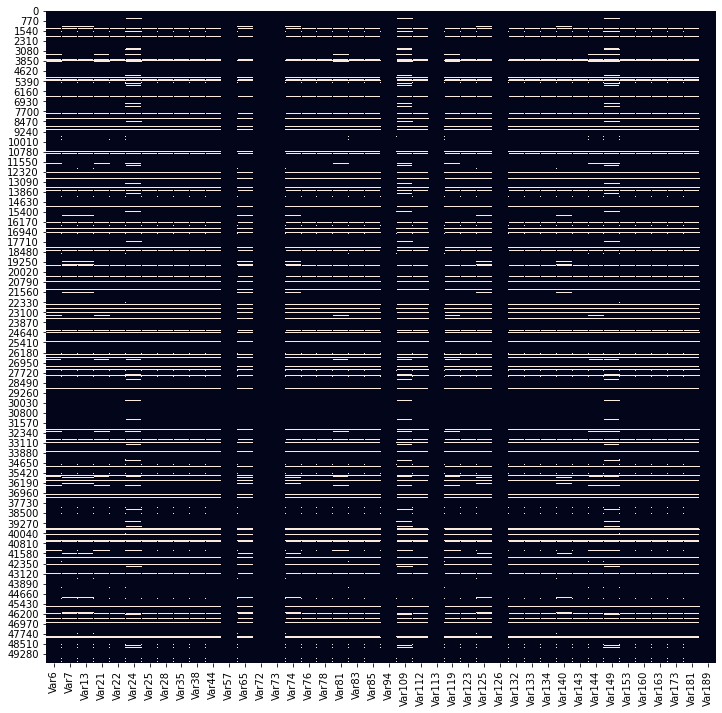

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[numerical_cols].isnull(), cbar=False)

That is looking a lot better. We have removed all the sparsely populated entries and are still left with > 44,000 datapoints.

Now we only have a few columns to deal with

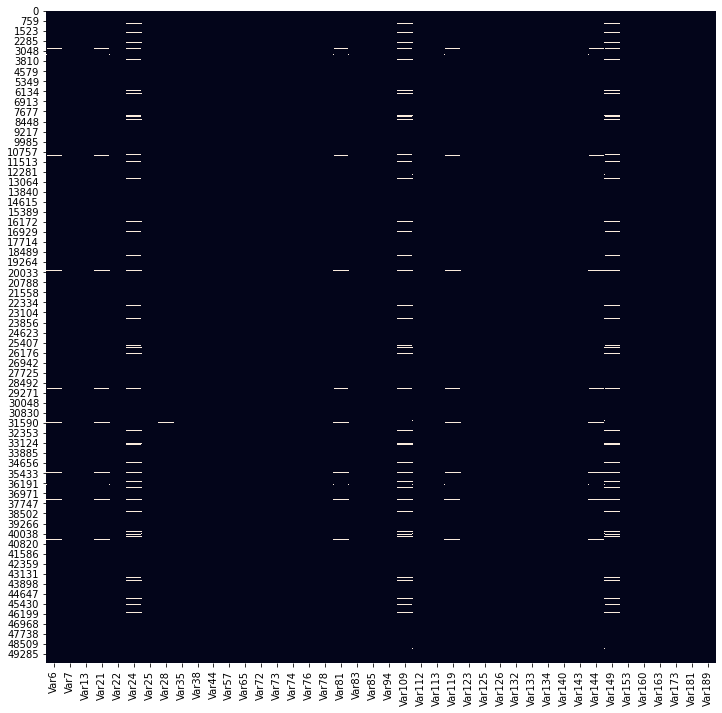

In [47]:
null_indices = df_cleaned[np.isnan(df_cleaned['Var65'])].index
df_cleaned.drop(null_indices, inplace=True, errors='ignore')

plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[numerical_cols].isnull(), cbar=False)

In [48]:
len(df_cleaned)

44461

Now let's select out the numerical columns that have less than 44,461 entries. And then for each of these columns let's see if there is any correlation with any other column

In [49]:
nan_cols = df_cleaned[df_cleaned.columns[df_cleaned.count() < 44461]].columns & numerical_cols

nan_cols

Index(['Var6', 'Var21', 'Var24', 'Var28', 'Var81', 'Var109', 'Var119',
       'Var144', 'Var149'],
      dtype='object')

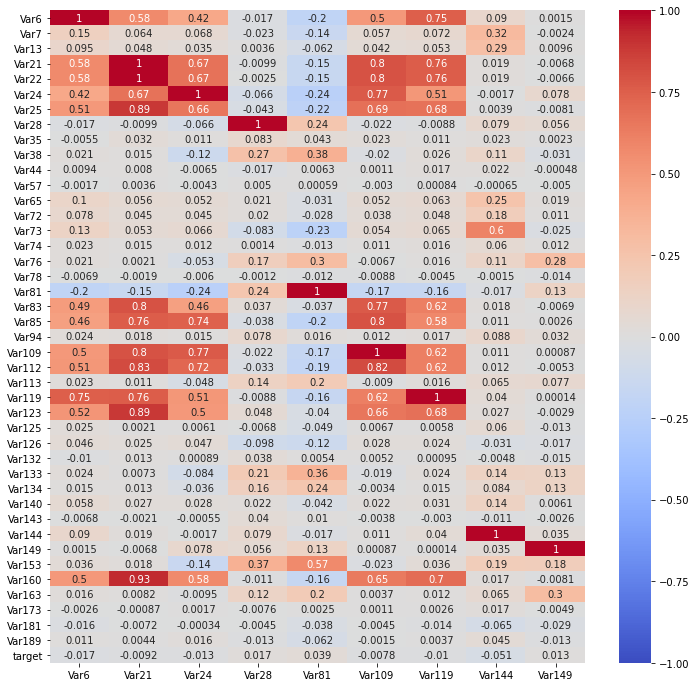

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.corr()[nan_cols],  vmin=-1, vmax=1, cmap='coolwarm', annot=True)

For all the columns except for 2, they have correlation values over 0.5 with at least 1 column in the dataset. *NOTE: A lot of the columns with missing values were highly correlated with each other, so in the loop below I make sure that I return a dictionary that includes columns that have all their values*

For these columns we can use regression imputation as we did before.



In [51]:
dictionary = dict()
df_correlation = df_cleaned.corr()[nan_cols].drop('target', axis=0)
nan_set = set(nan_cols)
for col in nan_cols:
    dictionary[col] = list(set(get_correlated_columns(df_correlation, numerical_cols, nan_cols, 0.5, col)) - nan_set)
    print(dictionary[col])

['Var25', 'Var160', 'Var22', 'Var123', 'Var112']
['Var25', 'Var85', 'Var160', 'Var83', 'Var22', 'Var123', 'Var112']
['Var25', 'Var85', 'Var160', 'Var22', 'Var123', 'Var112']
[]
['Var153']
['Var25', 'Var85', 'Var160', 'Var83', 'Var22', 'Var123', 'Var112']
['Var25', 'Var85', 'Var160', 'Var83', 'Var22', 'Var123', 'Var112']
['Var73']
[]


In [52]:

# Make a new df that includes the column with missing values, as well as the columns it is correlated with
def make_regression_df(column_name, dictionary, dataframe):
    regression_df = dataframe[dictionary[column_name]].copy()
    regression_df[column_name] = dataframe[column_name]
    regression_df.dropna(axis=0, inplace=True)
    return regression_df

# Fit a regression using all but the final column as independent variables and the final column as the
# dependent variable
def fit_regression_model(dataframe):
    model = LinearRegression()
    model.fit(dataframe.iloc[:,:-1], dataframe.iloc[:,-1])
    return model

# Get predictions for missing values for column_name
def get_predictions(column_name, dictionary, dataframe, model):
    # Get the entries where 'Var72' is NaN and drop entries where either 'Var7' or 'Var65' is NaN
    X_values = dataframe[np.isnan(dataframe[column_name])][dictionary[column_name]]
    X_values = X_values.dropna(axis=0)
    
    predicted = pd.DataFrame(model.predict(X_values), index=X_values.index, columns=[column_name])
    return predicted

Here we see how much of the variation in the columns that are missing values are explained by regressing their values onto the columns that they have high correlation with. 

Interestingly, 'Var21' is completely explained by the columns that it is highly correlated with. As a result adding it provides no additional information for the models I will fit later so I will drop it. The $R^2$ for 'Var109' is very high too so regression imputation can be used to replace it's values.

For 'Var24' and 'Var119' columns, we need to determine if this is a high $R^2$ value by plotting it against the columns it is correlated with

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

for col in nan_cols:
    if len(dictionary[col]) > 0:
        test_df = make_regression_df(col, dictionary=dictionary, dataframe=df_cleaned)
        model = fit_regression_model(test_df)
        predict = model.predict(test_df.iloc[:, :-1])
        mse = mean_squared_error(y_true=test_df.iloc[:,-1], y_pred=predict)
        mean = np.mean(test_df.iloc[:,-1])
        print("{} r squared score using regression: {:.2f}".format(col, r2_score(y_true=test_df.iloc[:,-1], y_pred=predict)))

Var6 r squared score using regression: 0.34
Var21 r squared score using regression: 1.00
Var24 r squared score using regression: 0.65
Var81 r squared score using regression: 0.33
Var109 r squared score using regression: 0.80
Var119 r squared score using regression: 0.58
Var144 r squared score using regression: 0.36


Let's impute the values for 'Var109' and drop the 'Var21' column.

Interestingly, 'Var109' predictions are all 9.4 which explains 80% of the variance. This appears to be because most of its values are clustered around the lower end of its range with some big outliers

In [54]:
df_cleaned.drop('Var21', axis=1, inplace=True, errors='ignore')

In [55]:
test_df = make_regression_df('Var109', dictionary=dictionary, dataframe=df_cleaned)
model = fit_regression_model(test_df)
predict = get_predictions('Var109', dictionary=dictionary, dataframe=df_cleaned, model=model)
predict.describe()

,Var109
count,2195.000000
mean,9.404447
std,0.000000
min,9.404447
25%,9.404447
50%,9.404447
75%,9.404447
max,9.404447


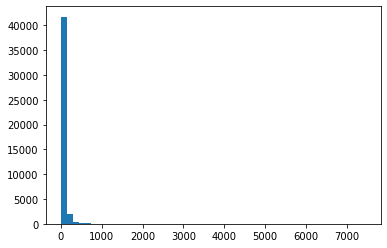

In [56]:
df_cleaned.update(other=predict, overwrite=False)
plt.hist(df_cleaned['Var109'], bins=50)
plt.show()

In [57]:
# Update the dictionary with the columns left to impute data for
dictionary.pop('Var109')
dictionary.pop('Var21')

['Var25', 'Var85', 'Var160', 'Var83', 'Var22', 'Var123', 'Var112']

In [58]:
nan_cols = list(set(nan_cols) - set(['Var21', 'Var109']))
nan_cols

['Var144', 'Var119', 'Var81', 'Var149', 'Var28', 'Var24', 'Var6']

Now let's plot the distribution of values for the remaining columns that we need to impute data for.

What is clear from the two sets of graphs below is that all of the remaining columns exhibit skewed distributions.

Therefore, using the median as the impute value is most likely a good idea. For the 'Var28' graph it looks like it oculd be Normally distributed but since the median and mean are so similar I will just use the median

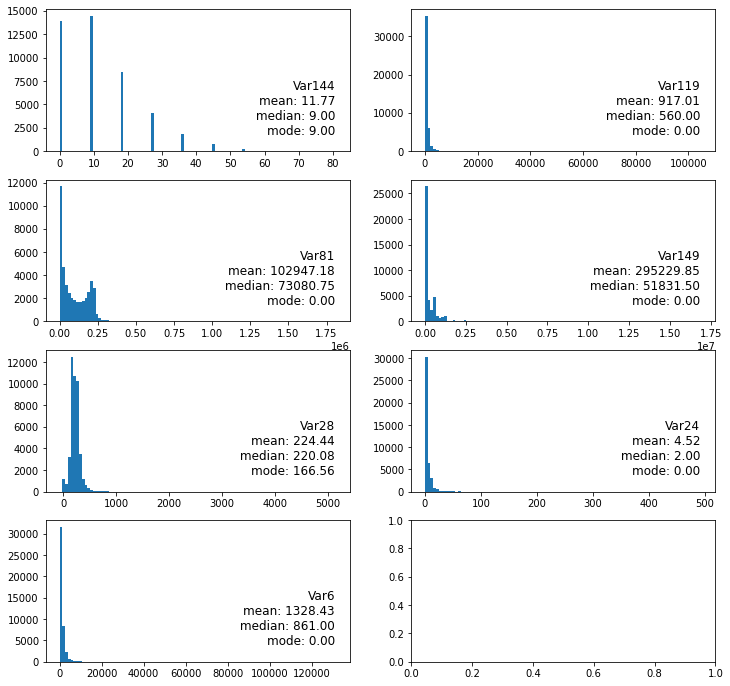

In [59]:
fig, axs = plt.subplots(4,2, figsize=(12,12))

axs = axs.ravel()

for i in range(len(nan_cols)):
    df = df_cleaned[nan_cols[i]].dropna(axis=0)
    mean = np.mean(df)
    median = np.median(df)
    value, count = np.unique(df, return_counts=True)
    mode = value[np.argmax(count)]
    axs[i].hist(df, bins=100)
    axs[i].text(0.95, 0.1, '{}\nmean: {:0.2f}\n median: {:0.2f}\nmode: {:0.2f}'.format(nan_cols[i], mean, median, mode), 
                verticalalignment='bottom', horizontalalignment='right', transform=axs[i].transAxes, fontsize=12)    
    
plt.show()

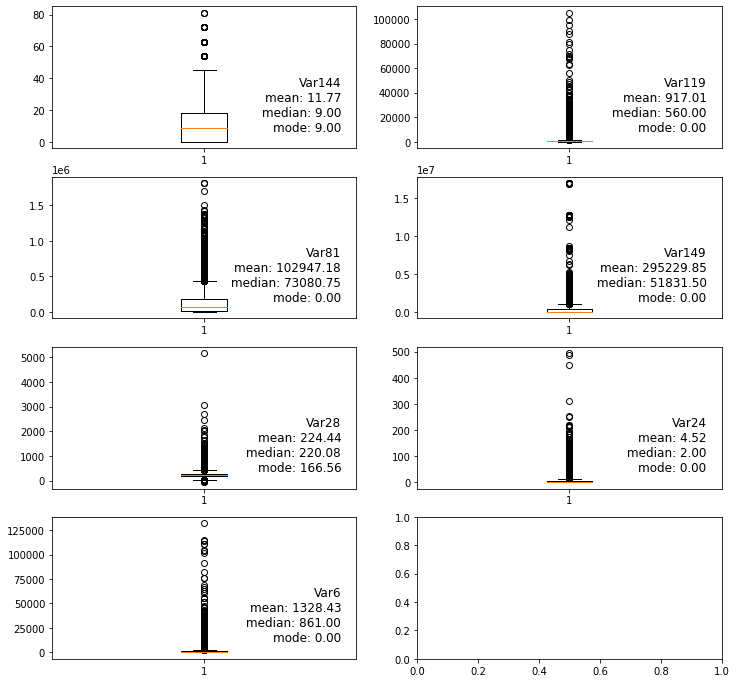

In [60]:
fig, axs = plt.subplots(4,2, figsize=(12,12))

axs = axs.ravel()

for i in range(len(nan_cols)):
    df = df_cleaned[nan_cols[i]].dropna(axis=0)
    mean = np.mean(df)
    median = np.median(df)
    value, count = np.unique(df, return_counts=True)
    mode = value[np.argmax(count)]
    axs[i].boxplot(df)
    axs[i].text(0.95, 0.1, '{}\nmean: {:0.2f}\n median: {:0.2f}\nmode: {:0.2f}'.format(nan_cols[i], mean, median, mode), 
                verticalalignment='bottom', horizontalalignment='right', transform=axs[i].transAxes, fontsize=12)    
    
plt.show()

In [61]:
for col in nan_cols:
    median = np.median(df_cleaned[col].dropna(axis=0))
    df_cleaned[col].fillna(value=median, inplace=True)

In [78]:
df_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var6,44461.0,1.322976e+03,2.682004e+03,0.000000e+00,5.250000e+02,8.610000e+02,1.421000e+03,131761.00
Var7,44461.0,6.809496e+00,6.326053e+00,0.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,140.00
Var13,44461.0,1.249688e+03,2.794955e+03,0.000000e+00,0.000000e+00,2.320000e+02,1.604000e+03,197872.00
Var22,44461.0,2.905993e+02,7.074650e+02,0.000000e+00,1.350000e+02,1.800000e+02,2.850000e+02,45340.00
Var24,44461.0,4.396347e+00,9.735526e+00,0.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,494.00
Var25,44461.0,9.695167e+01,2.150980e+02,0.000000e+00,1.600000e+01,4.800000e+01,1.120000e+02,13168.00
Var28,44461.0,2.244363e+02,9.868824e+01,-6.688000e+01,1.665600e+02,2.200800e+02,2.664000e+02,5158.56
Var35,44461.0,7.160208e-01,2.995838e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,110.00
Var38,44461.0,2.575670e+06,3.009775e+06,0.000000e+00,7.662000e+03,1.274184e+06,4.567674e+06,18846900.00
Var44,44461.0,1.674051e-01,1.634060e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,135.00


Okay, we are done with the numerical data.

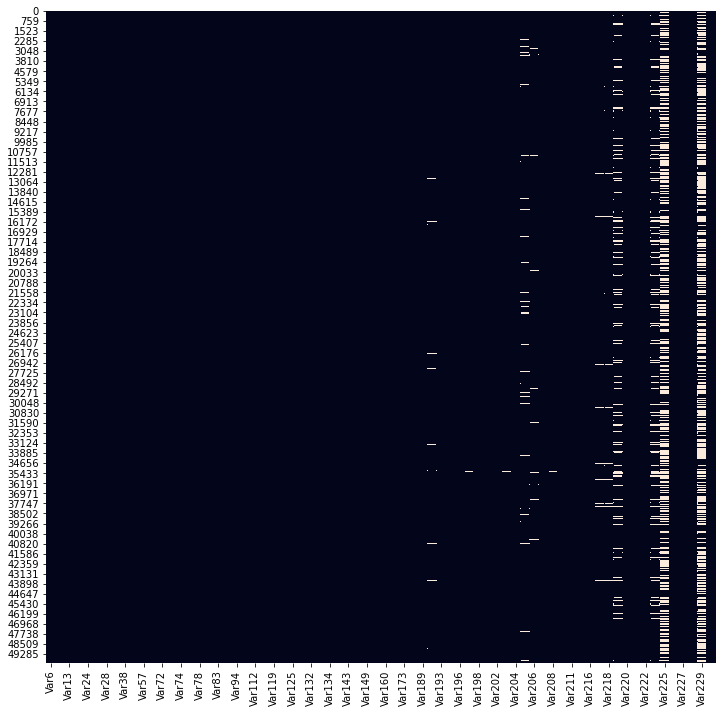

In [79]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.isnull(), cbar=False)

In [80]:
numerical_cols = numerical_cols & df_cleaned.columns
numerical_cols

Index(['Var6', 'Var7', 'Var13', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35',
       'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109', 'Var112',
       'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133',
       'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160',
       'Var163', 'Var173', 'Var181', 'Var189'],
      dtype='object')

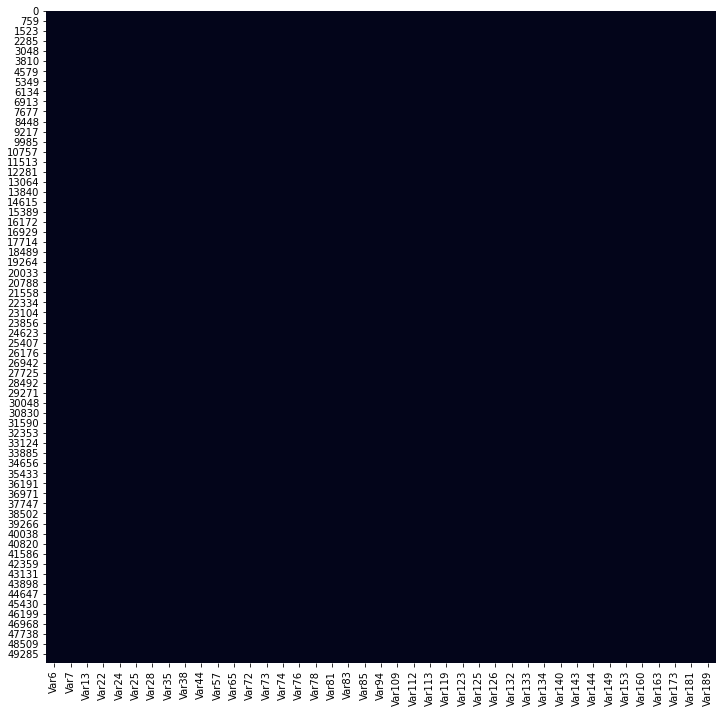

In [81]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[numerical_cols].isnull(), cbar=False)

***
### Categorical  Data

Let's start by looking at how many of the values for the categorical columns are null. From this plot there is a lot of categorical columns with missing values. With this many missing values it may just be best to drop the column altogether but let's first see what the actual values of these columns are

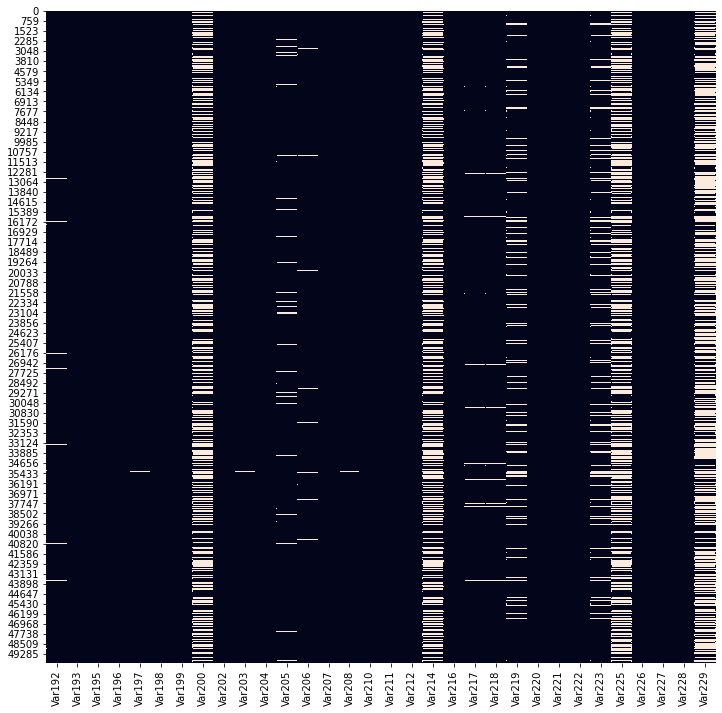

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[categorical_cols].isnull(), cbar=False)

First lets check out 'Var200' column which has a lot of missing values.

Out of 24000 values that are not null there is 15000 unique values. Because of this and the fact that the data is scrambled, there is no way of grouping the data into smaller sub values for this category.

In [84]:
print(df_cleaned['Var200'].nunique())
df_cleaned['Var200'].dropna(axis=0)

KeyError: 'Var200'

In [85]:
df_cleaned.drop('Var200', axis=1, inplace=True, errors='ignore')

Next let's look at the 'Var214' column.

Looks like the same story as above so again drop it.

In [86]:
print(df_cleaned['Var214'].nunique())
df_cleaned['Var214'].dropna(axis=0)

KeyError: 'Var214'

In [87]:
df_cleaned.drop('Var214', axis=1, inplace=True, errors='ignore')

In [88]:
# Update the columns
categorical_cols = df_cleaned.columns & categorical_cols.values
categorical_cols

Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218', 'Var219',
       'Var220', 'Var221', 'Var222', 'Var223', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229'],
      dtype='object')

Now 'Var225'.

This colum only has 3 unique values out of 23,000 not null entries so I will keep this for now as we may be able to imputate values for it

In [89]:
print(df_cleaned['Var225'].nunique())
df_cleaned['Var225'].dropna(axis=0)

3


2        kG3k
4        kG3k
6        kG3k
8        kG3k
9        kG3k
         ... 
49989    kG3k
49990    kG3k
49992    ELof
49996    kG3k
49997    ELof
Name: Var225, Length: 23784, dtype: object

Finally, 'Var229' also has a significant number of missing values.

Again, there is only 4 unique values out of 21500 non-null entries so we keep this.

In [90]:
print(df_cleaned['Var229'].nunique())
df_cleaned['Var229'].dropna(axis=0)

4


2        am7c
4        mj86
5        am7c
6        am7c
8        am7c
         ... 
49980    am7c
49989    am7c
49990    mj86
49992    mj86
49996    am7c
Name: Var229, Length: 21500, dtype: object

Now let's check all the columns for the amount of unique values they have as well as the number of non-null values

In [91]:

for col in categorical_cols:
    print("{} has {} unique values out of a total of {} non-null entries".format(col, df_cleaned[col].nunique(),
                                                                                 df_cleaned[col].dropna(axis=0).count()))

Var192 has 361 unique values out of a total of 44160 non-null entries
Var193 has 51 unique values out of a total of 44461 non-null entries
Var195 has 23 unique values out of a total of 44461 non-null entries
Var196 has 4 unique values out of a total of 44461 non-null entries
Var197 has 224 unique values out of a total of 44338 non-null entries
Var198 has 3992 unique values out of a total of 44461 non-null entries
Var199 has 4672 unique values out of a total of 44457 non-null entries
Var202 has 5614 unique values out of a total of 44460 non-null entries
Var203 has 5 unique values out of a total of 44338 non-null entries
Var204 has 100 unique values out of a total of 44461 non-null entries
Var205 has 3 unique values out of a total of 42785 non-null entries
Var206 has 21 unique values out of a total of 43942 non-null entries
Var207 has 14 unique values out of a total of 44461 non-null entries
Var208 has 2 unique values out of a total of 44338 non-null entries
Var210 has 6 unique values ou

Many columns have way too many categories to be useful in in a dummy variable scheme. 

The first thing I am going to do is drop any columns that have more than 500 unique values. For a dataset of only 50,000 points having so many categories for a single column is likely to not have much predictive power

In [92]:
cols_to_drop = categorical_cols[df_cleaned[categorical_cols].nunique() > 500]
print(cols_to_drop)
df_cleaned.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
df_cleaned.head()

Index(['Var198', 'Var199', 'Var202', 'Var216', 'Var217', 'Var220', 'Var222'], dtype='object')


,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,Var218,Var219,Var221,Var223,Var225,Var226,Var227,Var228,Var229,target
0,1526.0,7.0,184.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,...,cJvF,FzaX,oslk,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1
1,525.0,0.0,0.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,...,NaN,FzaX,oslk,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,5236.0,7.0,904.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,...,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1
3,861.0,0.0,0.0,0.0,2.0,0.0,22.08,0.0,0.0,0.0,...,UYBR,FzaX,oslk,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1
4,1029.0,7.0,3216.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,...,UYBR,FzaX,oslk,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1


In [93]:
# Update categorical columns
categorical_cols = df_cleaned.columns & categorical_cols.values
categorical_cols

Index(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212',
       'Var218', 'Var219', 'Var221', 'Var223', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229'],
      dtype='object')

#### Feature Engineering
Now lets start looking at the distribution of values within each column to see if we can group values to make new categories. Im going to try to group a category that has more than 50 unique values. These are the columns 'Var192', 'Var193', 'Var197', 'Var204', and 'Var212'

In [94]:

for col in categorical_cols:
    print("{} has {} unique values out of a total of {} non-null entries".format(col, df_cleaned[col].nunique(),
                                                                                 df_cleaned[col].dropna(axis=0).count()))

Var192 has 361 unique values out of a total of 44160 non-null entries
Var193 has 51 unique values out of a total of 44461 non-null entries
Var195 has 23 unique values out of a total of 44461 non-null entries
Var196 has 4 unique values out of a total of 44461 non-null entries
Var197 has 224 unique values out of a total of 44338 non-null entries
Var203 has 5 unique values out of a total of 44338 non-null entries
Var204 has 100 unique values out of a total of 44461 non-null entries
Var205 has 3 unique values out of a total of 42785 non-null entries
Var206 has 21 unique values out of a total of 43942 non-null entries
Var207 has 14 unique values out of a total of 44461 non-null entries
Var208 has 2 unique values out of a total of 44338 non-null entries
Var210 has 6 unique values out of a total of 44461 non-null entries
Var211 has 2 unique values out of a total of 44461 non-null entries
Var212 has 81 unique values out of a total of 44461 non-null entries
Var218 has 2 unique values out of a t

For 'Var192' there is 361 categories. From the graph there is a clear drop off in occurances for certain categories. I am going to encode this category into a new one with only two variables. One variable will indicate that the datapoint belongs to a category that occured > 150 times in 'Var192' and the other for a datapoint that occured < 150 times.

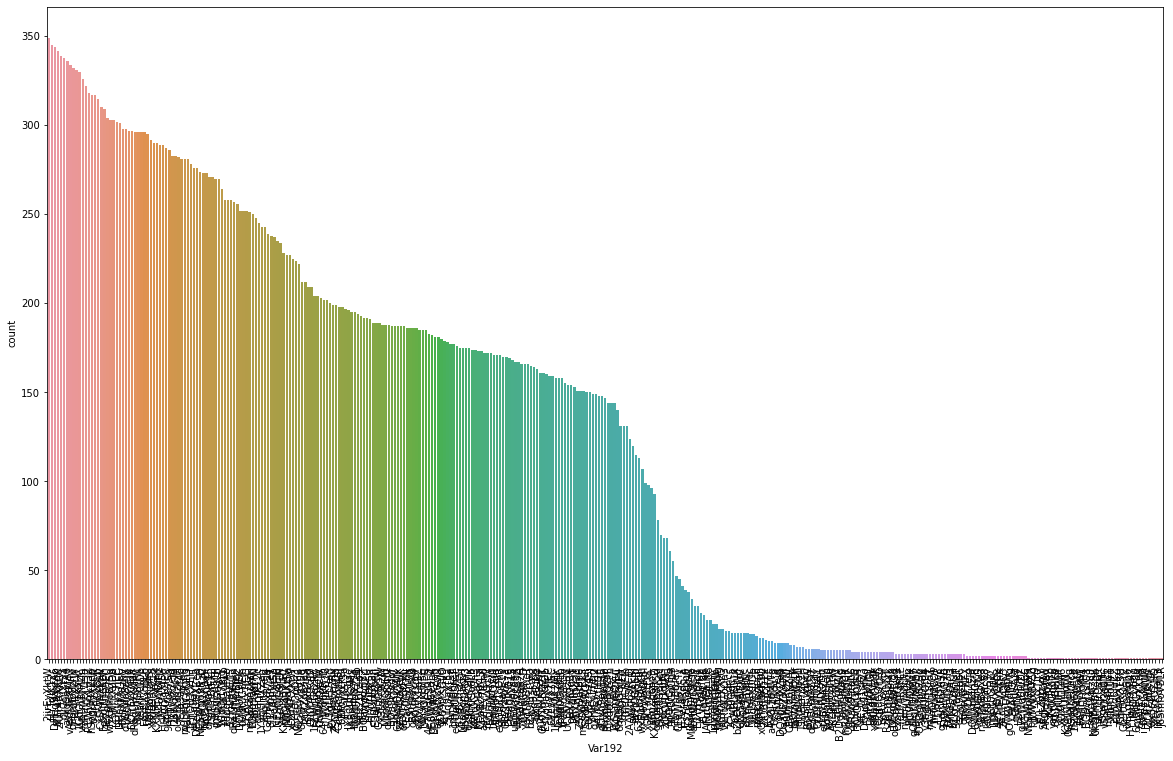

In [95]:
reduce_cols = ['Var192', 'Var193', 'Var197', 'Var204', 'Var212']
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.countplot(x=reduce_cols[0], data=df_cleaned, order=df_cleaned[reduce_cols[0]].value_counts().index)

In [96]:
mask = df_cleaned[reduce_cols[0]].value_counts() > 150
mask

2jirEyXktW     True
HYTrjIK12c     True
DHeq9ayfAo     True
8I1r4RXXnK     True
zKnr4RXktW     True
              ...  
ZCNZptRvgr    False
wx5r4Rs_Cc    False
2jfvyxUZHQ    False
IXSt0GoOh3    False
j6SmfoVBLR    False
Name: Var192, Length: 361, dtype: bool

In [97]:
high_cols = df_cleaned[reduce_cols[0]].dropna(axis=0).unique()[mask]
df_cleaned[reduce_cols[0] + '_com'] = df_cleaned[reduce_cols[0]].dropna(axis=0).map(lambda x: x in high_cols)

df_cleaned[reduce_cols[0] + '_com']

0         True
1         True
2         True
3         True
4         True
         ...  
49994     True
49995     True
49996    False
49997    False
49999     True
Name: Var192_com, Length: 44461, dtype: object

Now let's look at 'Var193'. It has 51 values. From the graph below the vast majority of datapoints have the value 'R012' for this column. I will use this as a value and group the rest into a separate value. So now the new column will have 2 values instead of 51

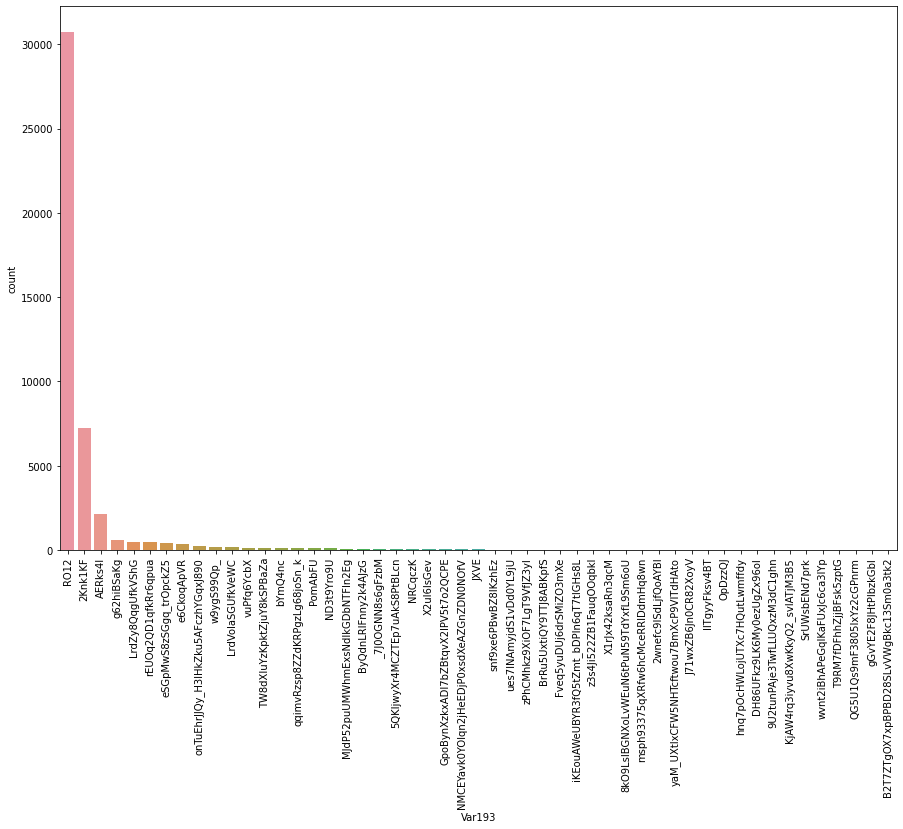

In [98]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x=reduce_cols[1], data=df_cleaned, order=df_cleaned[reduce_cols[1]].value_counts().index)

In [99]:
df_cleaned[reduce_cols[1] + '_com'] = df_cleaned[reduce_cols[1]].dropna(axis=0).map(lambda x: x in 'R012')
df_cleaned.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,Var221,Var223,Var225,Var226,Var227,Var228,Var229,target,Var192_com,Var193_com
0,1526.0,7.0,184.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,...,oslk,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1,True,False
1,525.0,0.0,0.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,...,oslk,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1,True,False
2,5236.0,7.0,904.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,...,Al6ZaUT,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1,True,False
3,861.0,0.0,0.0,0.0,2.0,0.0,22.08,0.0,0.0,0.0,...,oslk,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1,True,False
4,1029.0,7.0,3216.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,...,oslk,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1,True,False


Let's move on to 'Var197'. There is 224 unique value for this column. There is a masisve skew in the graph with some categories occuring much more often than others. Here I will assign any point belonging to one of the values that occured > 500 as one value and all the rest as another

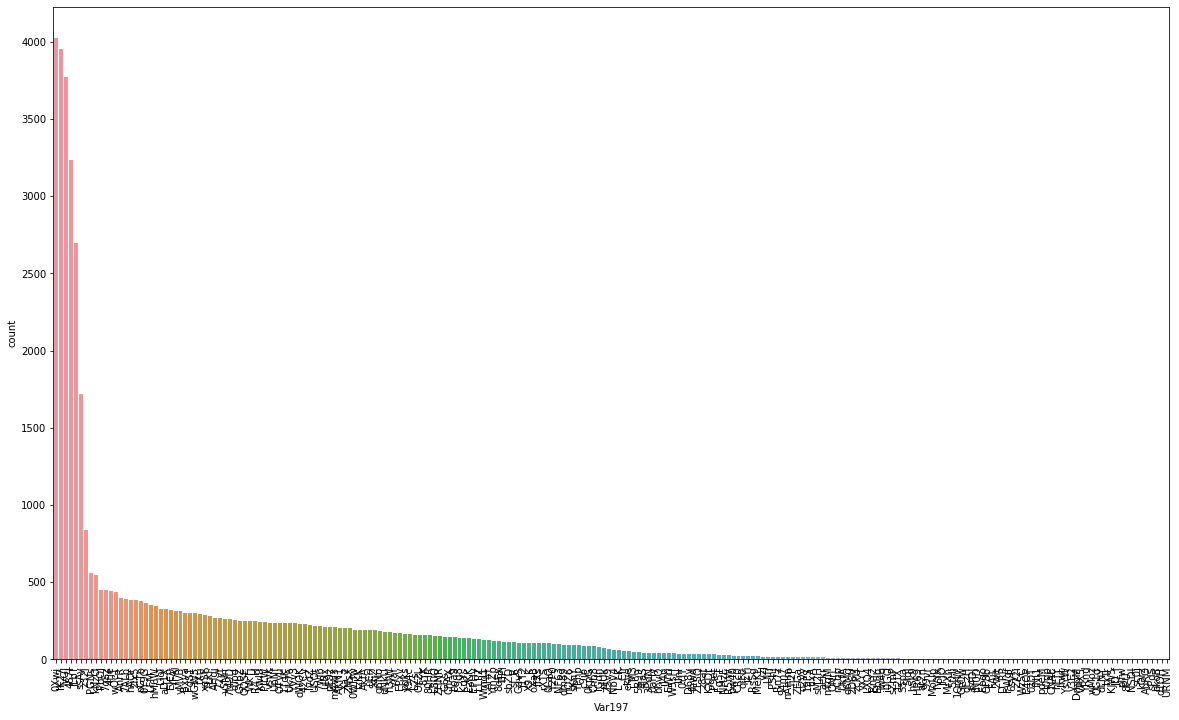

In [100]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.countplot(x=reduce_cols[2], data=df_cleaned, order=df_cleaned[reduce_cols[2]].value_counts().index)

In [101]:
mask = df_cleaned[reduce_cols[2]].value_counts() > 500
mask

0Xwj     True
lK27     True
TyGl     True
487l     True
JLbT     True
        ...  
AuRO    False
sPdS    False
bkoB    False
d1OH    False
URNM    False
Name: Var197, Length: 224, dtype: bool

In [102]:
high_cols = df_cleaned[reduce_cols[2]].dropna(axis=0).unique()[mask]
df_cleaned[reduce_cols[2] + '_com'] = df_cleaned[reduce_cols[2]].dropna(axis=0).map(lambda x: x in high_cols)

df_cleaned[reduce_cols[2] + '_com']

0         True
1         True
2         True
3         True
4         True
         ...  
49994     True
49995    False
49996    False
49997     True
49999    False
Name: Var197_com, Length: 44461, dtype: object

Now I consider 'Var204'. There is 100 unique values for this column. From the graph we can see that the spread across the categories is fairly even. Because of this, instead of creating just two new values, I am going to bin the values by how much they occur and make new values out of the bins.

I arbitrarily choose 10 bins to do this.

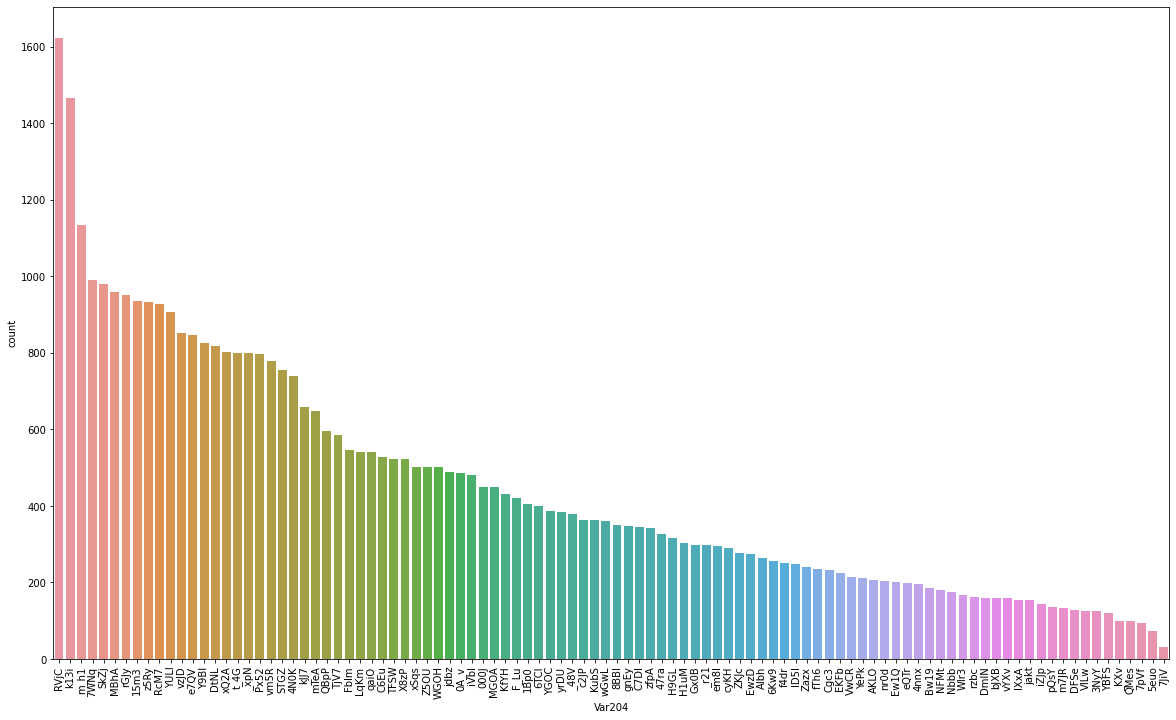

In [103]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.countplot(x=reduce_cols[3], data=df_cleaned, order=df_cleaned[reduce_cols[3]].value_counts().index)

In [104]:
bins = [df_cleaned[reduce_cols[3]].value_counts()[x:x+10].index for x in np.arange(0,9,1)]

In [105]:
# Construct a dictionary mapping the value of column 'Var204' to a new value dictated by which 
# bin the value falls into
bin_dict = dict()
i = 1
for counter, value in enumerate(df_cleaned[reduce_cols[3]].value_counts().index):
    bin_dict[value] = i
    if (counter % 10 == 0) & (counter != 0):
        i += 1

In [106]:
df_cleaned[reduce_cols[3] + '_com'] = df_cleaned[reduce_cols[3]].map(lambda x: bin_dict[x])
df_cleaned.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,Var225,Var226,Var227,Var228,Var229,target,Var192_com,Var193_com,Var197_com,Var204_com
0,1526.0,7.0,184.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,...,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1,True,False,True,3
1,525.0,0.0,0.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,...,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1,True,False,True,1
2,5236.0,7.0,904.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,...,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1,True,False,True,4
3,861.0,0.0,0.0,0.0,2.0,0.0,22.08,0.0,0.0,0.0,...,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1,True,False,True,1
4,1029.0,7.0,3216.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,...,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1,True,False,True,1


Now consider 'Var212'. there is 81 unique values for this column. This is another column where one categorization dominates over the others so let's make this a category and all the other categories a new category

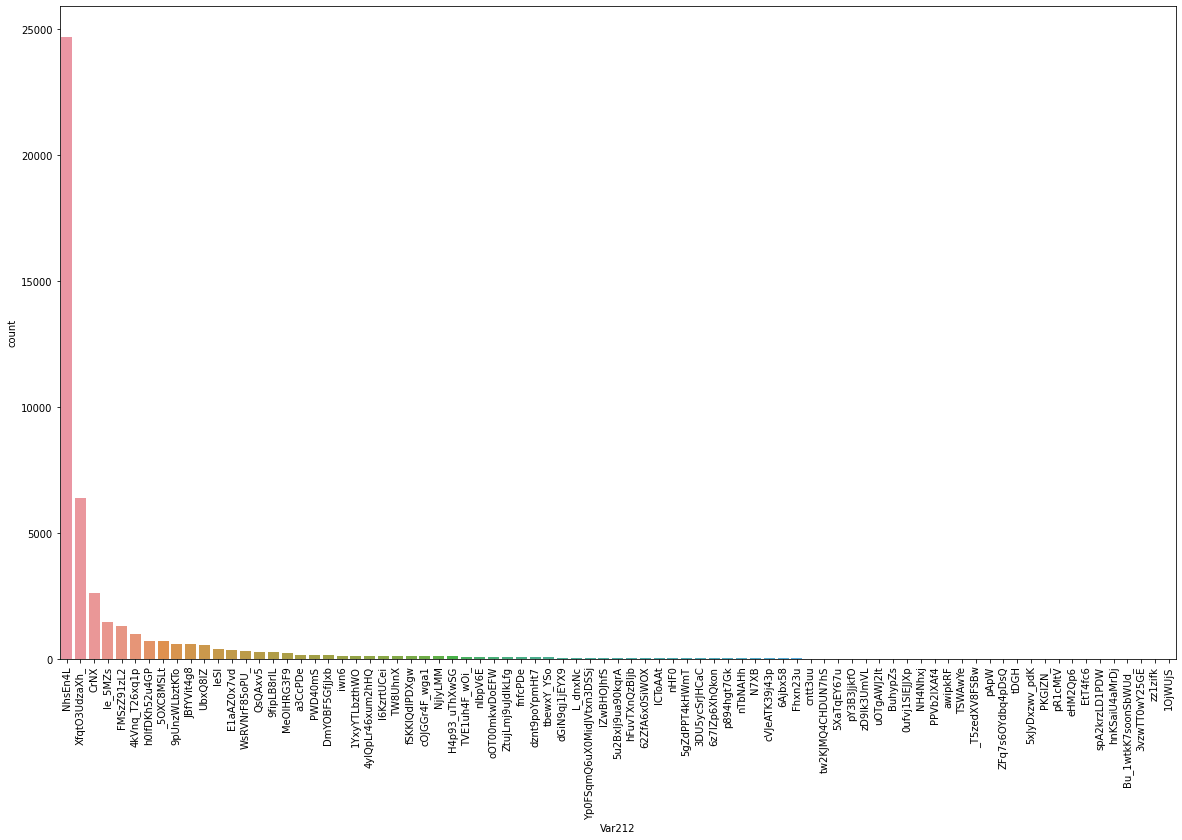

In [107]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
sns.countplot(x=reduce_cols[4], data=df_cleaned, order=df_cleaned[reduce_cols[4]].value_counts().index)

In [108]:
df_cleaned[reduce_cols[4] + '_com'] = df_cleaned[reduce_cols[4]] == 'NhsEn4L'
df_cleaned.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,Var226,Var227,Var228,Var229,target,Var192_com,Var193_com,Var197_com,Var204_com,Var212_com
0,1526.0,7.0,184.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,...,xb3V,RAYp,F2FyR07IdsN7I,NaN,-1,True,False,True,3,False
1,525.0,0.0,0.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,...,fKCe,RAYp,F2FyR07IdsN7I,NaN,1,True,False,True,1,True
2,5236.0,7.0,904.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,...,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,-1,True,False,True,4,False
3,861.0,0.0,0.0,0.0,2.0,0.0,22.08,0.0,0.0,0.0,...,FSa2,RAYp,F2FyR07IdsN7I,NaN,-1,True,False,True,1,True
4,1029.0,7.0,3216.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,...,FSa2,RAYp,F2FyR07IdsN7I,mj86,-1,True,False,True,1,False


Okay now all categorical columns have been reduced to have < 50 unique values. I can now go ahead and drop the columns that I have just made new columns for

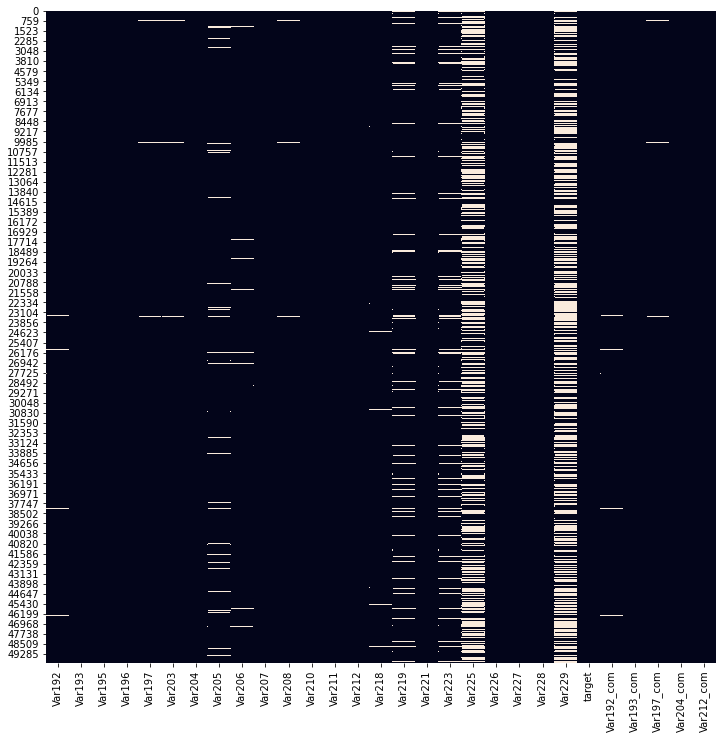

In [109]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned.drop(numerical_cols, axis=1).isnull(), cbar=False)

In [110]:
df_cleaned.drop(['Var192', 'Var193', 'Var197', 'Var204','Var212'], axis=1, inplace=True, errors='ignore')

In [111]:
# Update categorical columns
categorical_cols = df_cleaned.drop(numerical_cols, axis=1).columns
categorical_cols = categorical_cols.drop('target')
categorical_cols

Index(['Var195', 'Var196', 'Var203', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var210', 'Var211', 'Var218', 'Var219', 'Var221', 'Var223', 'Var225',
       'Var226', 'Var227', 'Var228', 'Var229', 'Var192_com', 'Var193_com',
       'Var197_com', 'Var204_com', 'Var212_com'],
      dtype='object')

#### More Imputting Data
Okay now for imputing data. First let's see how many NaN values each column has and make a list of columns we need to impute.

To simplify things I am going to make NaN values their own category for all columns except for 'Var225' and 'Var229'.

In [113]:
impute_cols = []
for col in categorical_cols:
     if df_cleaned[col].dropna(axis=0).count() != 44461:
            print('{} has {} missing values and {} unique values'.format(col, np.sum(df_cleaned[col].isnull()),
                                                                        df_cleaned[col].nunique()))
            impute_cols.append(col)

Var203 has 123 missing values and 5 unique values
Var205 has 1676 missing values and 3 unique values
Var206 has 519 missing values and 21 unique values
Var208 has 123 missing values and 2 unique values
Var218 has 642 missing values and 2 unique values
Var219 has 3779 missing values and 22 unique values
Var223 has 3779 missing values and 4 unique values
Var225 has 20677 missing values and 3 unique values
Var229 has 22961 missing values and 4 unique values
Var192_com has 301 missing values and 2 unique values
Var197_com has 123 missing values and 2 unique values


In [114]:
df_cleaned[categorical_cols.drop(['Var225', 'Var229'])] = df_cleaned[categorical_cols.drop(['Var225', 'Var229'])].fillna(value='Missing').copy()

df_cleaned['Var225']

0         NaN
1         NaN
2        kG3k
3         NaN
4        kG3k
         ... 
49994     NaN
49995     NaN
49996    kG3k
49997    ELof
49999     NaN
Name: Var225, Length: 44461, dtype: object

Okay now we are just left with 'Var225' and 'Var229' to impute values for. We have 50,000 training samples, now with all other columns filled in, so maybe we can use something moe advanced to try to predict these columns. Let's try building a KNN classifier. 

#### KNN Imputation

*NOTE: This won't scale to larger datasets, and might not even work well with the dataset we have currently since there will be a huge number of dimensions. There is approximately 249 dimensions to the dataset and 45000 datapoints giving around 180 data points per dimension. We might be okay.*

In [96]:
print(np.sum(df_cleaned[categorical_cols].nunique()) + len(numerical_cols))
print(44491/249)

249
178.67871485943775


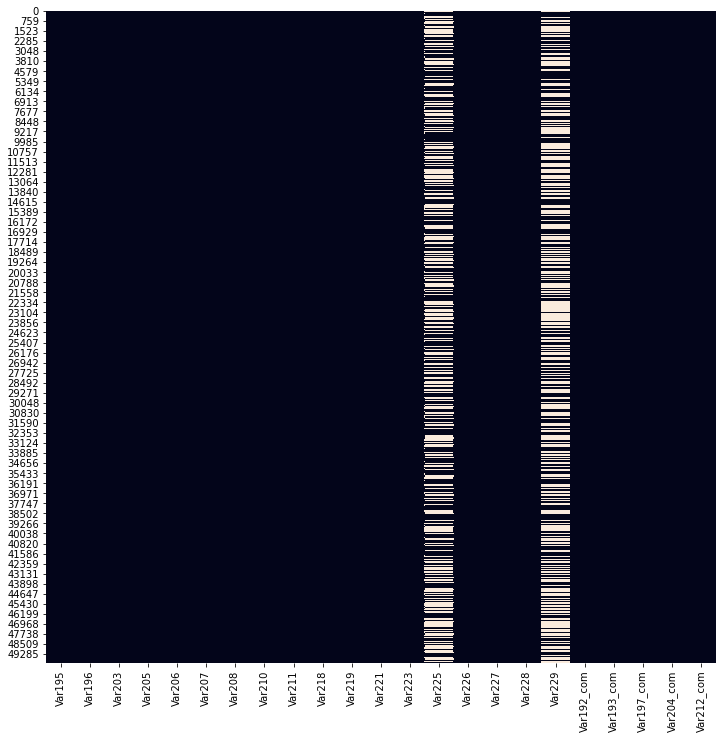

In [97]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cleaned[categorical_cols].isnull(), cbar=False)

Before I am able to use KNN I need to convert all the categorical variables to a one-hot encoded dataframe. I also need to convert the 'Var225' and 'Var229' into label encoded

In [115]:
from sklearn.preprocessing import OneHotEncoder

In [116]:
# To use OneHotEncoding I need to convert all the categorical columns into strings
ohe_df = df_cleaned[categorical_cols.drop(['Var225', 'Var229'])].copy().astype(str)

ohe_df.shape

(44461, 21)

In [117]:
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(ohe_df)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [118]:
array = enc.transform(ohe_df).toarray()
array.shape

(44461, 201)

In [121]:
test_df = pd.DataFrame(data=array, columns=enc.get_feature_names(), index=df_cleaned.index)
test_df.head(-10)

,x0_ArtjQZ8ftr3NB,x0_ArtjQZQO1r9fC,x0_ArtjQZmIvr94p,x0_BNjsq81k1tWAYigY,x0_CiJDdr4TQ0rGERIS,x0_CiJsoa4TQ0rGHlMp,x0_CuXi4je,x0_F1JQrEL,x0_I9xt3GBDKUbd8,x0_I9xt3GDRhUK7p,...,x19_2,x19_3,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
49987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
df_cleaned[numerical_cols].shape

(44461, 41)

In [123]:
df_xtrain_knn = df_cleaned[numerical_cols].join(test_df).copy()

I also need to scale the columns so that they are all on the same scale otherwise the distance metric will be distorted by columns with large values

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [125]:
scaler.fit(df_xtrain_knn)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [126]:
df_xtrain_knn = pd.DataFrame(data=scaler.transform(df_xtrain_knn), index=df_xtrain_knn.index.values, columns=df_xtrain_knn.columns)
df_xtrain_knn.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_2,x19_3,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now I label encode the two columns I am trying to predict, leaving the nan's in place

In [127]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()
le.fit(df_cleaned['Var225'].dropna(axis=0).astype(str))
le.classes_

array(['ELof', 'kG3k', 'xG3x'], dtype=object)

In [129]:
df_ytrain_knn = pd.DataFrame(index=df_cleaned['Var225'].index)

df_ytrain_knn['Var225_encode'] = df_cleaned['Var225'].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

In [130]:
df_ytrain_knn['Var225_encode'].unique()

array([nan,  1.,  2.,  0.])

In [131]:
le.fit(df_cleaned['Var229'].dropna(axis=0).astype(str))
le.classes_

array(['am7c', 'mj86', 'oJmt', 'sk2h'], dtype=object)

In [132]:
df_ytrain_knn['Var229_encode'] = df_cleaned['Var229'].apply(lambda x: le.transform([x])[0] if type(x) == str else x)

df_ytrain_knn['Var229_encode'].unique()

array([nan,  0.,  1.,  2.,  3.])

In [133]:
df_to_impute = df_xtrain_knn.join(df_ytrain_knn)
df_to_impute.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode,Var229_encode
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


Finally I can try imputing using KNN.

This takes way too long. Instead, Im going to try training two Deep Neural Nets to predict the missing values

In [115]:
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=10, weights='distance', copy=True, add_indicator=True)
#imputer.fit_transform(df_to_impute)

#### Deep Neural Net Imputation

I first need to split my dataset into training set and test set (one with the nan's)

In [134]:
x_train = df_to_impute.dropna(axis=0).drop(['Var225_encode', 'Var229_encode'], axis=1).copy()
y_225_labelled = df_to_impute.dropna(axis=0)['Var225_encode']
y_229_labelled = df_to_impute.dropna(axis=0)['Var229_encode']

x_225_test = df_to_impute[df_to_impute['Var225_encode'].isnull()].drop(['Var225_encode', 'Var229_encode'], axis=1)
x_229_test = df_to_impute[df_to_impute['Var229_encode'].isnull()].drop(['Var225_encode', 'Var229_encode'], axis=1)

In [135]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [136]:
X_train, X_test, y_train_225, y_test_225 = train_test_split(x_train, y_225_labelled, test_size=0.33)
y_train_225 = to_categorical(y_train_225)
y_train_225

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

Construct NN and train

In [137]:
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential


In [138]:
X_train.shape

(13002, 242)

In [139]:
model = Sequential()

model.add(Dense(400, input_shape=(242,), activation='relu'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(300, activation='sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [140]:
history = model.fit(X_train, y_train_225, epochs=50, batch_size=128, verbose=1, validation_split=0.25, shuffle=True)

Train on 9751 samples, validate on 3251 samples
Epoch 1/50
9751/9751 [==============================] - 1s 148us/step - loss: 0.9642 - accuracy: 0.4578 - val_loss: 0.9576 - val_accuracy: 0.4731
Epoch 2/50
9751/9751 [==============================] - 1s 95us/step - loss: 0.9486 - accuracy: 0.4704 - val_loss: 0.9549 - val_accuracy: 0.4731
Epoch 3/50
9751/9751 [==============================] - 1s 94us/step - loss: 0.9465 - accuracy: 0.4645 - val_loss: 0.9506 - val_accuracy: 0.4731
Epoch 4/50
9751/9751 [==============================] - 1s 100us/step - loss: 0.9467 - accuracy: 0.4641 - val_loss: 0.9507 - val_accuracy: 0.4731
Epoch 5/50
9751/9751 [==============================] - 1s 94us/step - loss: 0.9454 - accuracy: 0.4701 - val_loss: 0.9505 - val_accuracy: 0.4731
Epoch 6/50
9751/9751 [==============================] - 1s 94us/step - loss: 0.9456 - accuracy: 0.4611 - val_loss: 0.9521 - val_accuracy: 0.4731
Epoch 7/50
9751/9751 [==============================] - 1s 112us/step - loss: 0.

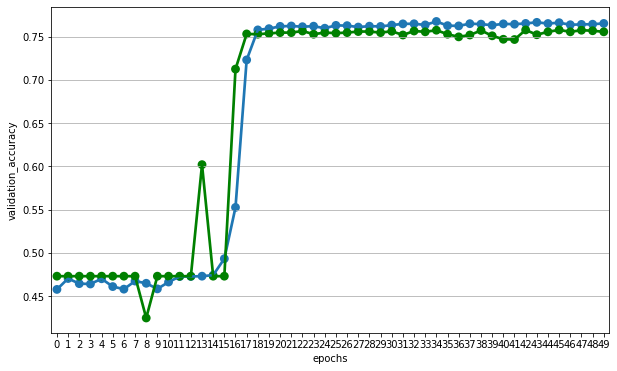

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
plt.grid()
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy']})

sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False, label='training set')
sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green', label='test set')
plt.show()

Evaluate the model on the test set and get predictions.

After some experimentation I was not able to get more than 76% accuracy on the validation or test set. Ive noticed the NN is not ever predicting class 2 which occurs far less than the other two classes.

Even so, if we say class 0 and 1 are occuring roughly 50% of the time in the test set. Then if we were guessing we would expect an accuracy of 50%, so an accuracy of 76% is not bad at all. Especially when we have so many values to input for this column so let's use the results of this.

In [142]:
model.evaluate(x=X_test, y=to_categorical(y_test_225))

6405/6405 [==============================] - 0s 64us/step


[0.6635962945562522, 0.7659640908241272]

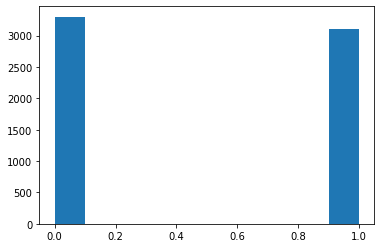

In [143]:
plt.hist(model.predict_classes(X_test))
plt.show()

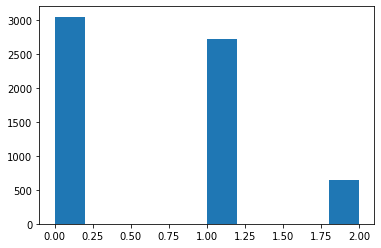

In [144]:
plt.hist(y_test_225)
plt.show()

In [145]:
x_225_test['Var225_encode'] = model.predict_classes(x_225_test)
x_225_test

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_3,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.000000,0.000189,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.000000,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,0.004994,0.05,0.015950,0.006176,0.004049,0.005468,0.051073,0.045455,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
7,0.000584,0.00,0.000000,0.000882,0.004049,0.001215,0.056922,0.000000,0.200378,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,0.015035,0.00,0.000000,0.003749,0.004049,0.006683,0.092394,0.000000,0.110067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
49993,0.016894,0.05,0.006246,0.003749,0.004049,0.004860,0.061315,0.136364,0.151122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
49994,0.002019,0.00,0.000000,0.021835,0.036437,0.032807,0.077207,0.000000,0.117515,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
49995,0.002709,0.00,0.000000,0.003639,0.004049,0.000000,0.067929,0.000000,0.320606,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


Now do the same for 'Var229'

In [146]:
X_train, X_test, y_train_229, y_test_229 = train_test_split(x_train, y_229_labelled, test_size=0.33)
y_train_229 = to_categorical(y_train_229)
y_train_229

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [174]:
X_train.shape

(13002, 242)

In [192]:
model = Sequential()

model.add(Dense(300, input_shape=(242,), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [193]:
history = model.fit(X_train, y_train_229, epochs=50, batch_size=128, verbose=1, validation_split=0.25, shuffle=True)

Train on 9751 samples, validate on 3251 samples
Epoch 1/50
9751/9751 [==============================] - 1s 98us/step - loss: 0.7548 - accuracy: 0.5098 - val_loss: 0.7078 - val_accuracy: 0.5337
Epoch 2/50
9751/9751 [==============================] - 1s 59us/step - loss: 0.7213 - accuracy: 0.5317 - val_loss: 0.7054 - val_accuracy: 0.5337
Epoch 3/50
9751/9751 [==============================] - 1s 59us/step - loss: 0.7150 - accuracy: 0.5404 - val_loss: 0.7048 - val_accuracy: 0.5334
Epoch 4/50
9751/9751 [==============================] - 1s 60us/step - loss: 0.7075 - accuracy: 0.5463 - val_loss: 0.7013 - val_accuracy: 0.5374
Epoch 5/50
9751/9751 [==============================] - 1s 58us/step - loss: 0.7074 - accuracy: 0.5491 - val_loss: 0.7020 - val_accuracy: 0.5414
Epoch 6/50
9751/9751 [==============================] - 1s 59us/step - loss: 0.7055 - accuracy: 0.5466 - val_loss: 0.6984 - val_accuracy: 0.5315
Epoch 7/50
9751/9751 [==============================] - 1s 59us/step - loss: 0.699

After a bit of experimentation I could not get the validation set acuracy to be any more than 52%. As with 'Var225' although there are 4 classes, only 2 of these classes dominate the occurances. Unlike 'Var225' it seems that the other variables really have no relationship with this variable. This can be seen from the graph below. The NN is overfitting the data and just remembering the values of 'Var229' rather than extracting any relationship from the other variables. This is evidenced by the validation set accuracy not moving from 50% which is just the same as guessing.

With the data being anonymized it is really difficult (actually impossible) to say what, if any, relationship this variable should have with the others. Because imputing values at this point would just be guessing I am going to drop 'Var229' from the dataset.

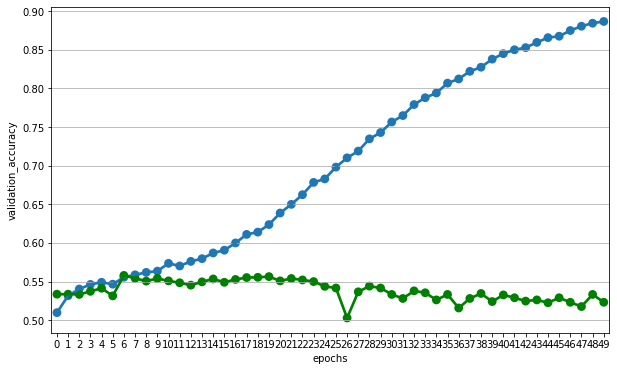

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,6))
plt.grid()
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['accuracy'], 'validation_accuracy': history.history['val_accuracy']})

sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False, label='training set')
sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green', label='test set')
plt.show()

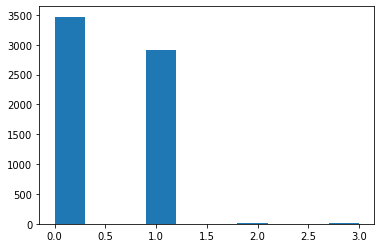

In [195]:
plt.hist(y_test_229)
plt.show()

***
## Putting the final dataset together
Finally I can put the dataset together with all values either imputed or dropped

In [147]:
df_to_impute.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode,Var229_encode
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [151]:
df_to_impute['Var225_encode'].fillna(x_225_test['Var225_encode'], inplace=True)
df_to_impute.drop(['Var229_encode'], axis=1, inplace=True, errors='ignore')

# Attach target column back to dataframe
df_to_impute = df_to_impute.join(df_cleaned['target'])

df_to_impute.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode,target
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1


This is the final dataset with features all standardized and one-hot-encoded for categorical variables

In [152]:
df_cleaned_draft1 = df_to_impute.copy()

df_cleaned_draft1.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode,target
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1


One final check to see if there is any null values

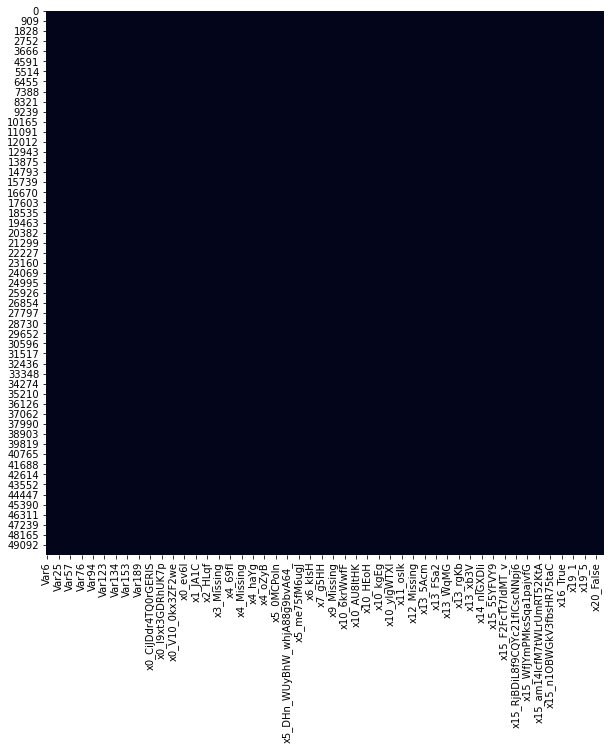

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cleaned_draft1.isnull(), cbar=False)

## Comments
This process of data cleaning was extremely challenging due to the occurance of so many missing values. This was made all the more difficult by the fact that we do not have access to the meanings of any column so we cannot make any logical conclusions about whether columns are useful or not.

This is clearly one of a possible many ways of cleaning this data and preparing it for prediction. I am highly anticipating having to come back to this process and tweak or even radically change what I have done so for now I will save this data out to a csv called draft 1.

In [154]:
df_cleaned_draft1.to_csv("../data/cleaned_datasets/df_cleaned_draft1.csv", index=False)

In [73]:
test_df = pd.read_csv('../data/cleaned_datasets/df_cleaned_draft1.csv')

In [74]:
test_df.head()

,Var6,Var7,Var13,Var22,Var24,Var25,Var28,Var35,Var38,Var44,...,x19_3,x19_4,x19_5,x19_6,x19_7,x19_8,x19_9,x20_False,x20_True,Var225_encode
0,0.011582,0.05,0.000930,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.003984,0.00,0.000000,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.039739,0.05,0.004569,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.006535,0.00,0.000000,0.000000,0.004049,0.000000,0.017024,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.007810,0.05,0.016253,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
